# Notebook for testing out scraping from reddit

- If you would like to run this notebook or the image scraping spider, I suggest that you create a conda virtual environment from my environment file `FindYourMeme.yml` following [this guide](https://conda.io/docs/user-guide/tasks/manage-environments.html#)
- If this doesn't work, it should be possbile to just install the individual packages needed by adding the correct conda channels

#### It is possible to use the json returned from a request to process reddit pages:

In [16]:
import json, requests

subreddit = 'dankmemes'

r = requests.get(
    'http://www.reddit.com/r/{}.json'.format(subreddit),
    headers={'user-agent': 'Mozilla/5.0'}
)

# view structure of an individual post
# print(json.dumps(r.json()['data']['children'][0]))

print(list(r.json()['data']['children'][0]['data'].keys()))

['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'thumbnail_height', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'author_flair_background_color', 'subreddit_type', 'ups', 'domain', 'media_embed', 'thumbnail_width', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'post_hint', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'banned_by', 'author_flair_type', 'contest_mode', 'selftext_html', 'likes', 'suggested_sort', 'banned_at_utc', 'view_count', 'archived', 'no_follow', 'is_crosspostable', 'pinned', 'over_18', 'preview

I just find this a little cumbersome compared to using praw but we might need to revert back depending on the utility of praw.

## Using 'praw'

- Quick-start guide for praw details how to use it, including how to get your own client_secret and client_id [here](https://praw.readthedocs.io/en/latest/getting_started/quick_start.html)
- Useful tutorial on a similar usage [here](https://inventwithpython.com/blog/2013/09/30/downloading-imgur-posts-linked-from-reddit-with-python/)
- Image text scraping is done with [tesseract-OCR](https://github.com/tesseract-ocr/tesseract) via [pytesseract](https://pypi.org/project/pytesseract/). If you want to run the code, you need to either download the binaries or build it from source and change the location command below.

In [1]:
import praw, requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (16, 9)

from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe' #<-Change this for your system

https://i.redd.it/rdv4sb2jy1221.png



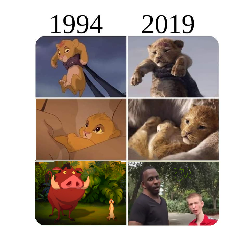

https://i.redd.it/kg3ru3bc02221.jpg



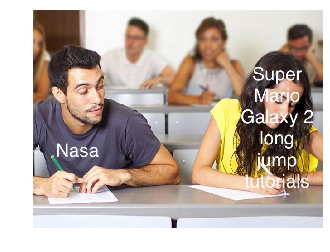

https://i.redd.it/qox8r2oyr2221.jpg
When you're playing hangman and don't want to lose  ——


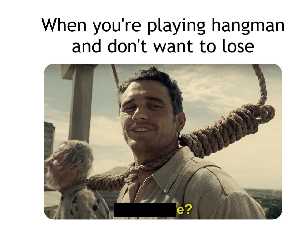

https://i.redd.it/0egv898ej2221.jpg
YouTuber: *makes a parody of a disney movie *  Disney: *sends a copyright claim and gets the money off the content * Porn film studios: *makes a whole porn parody of a disney movie* Disney;


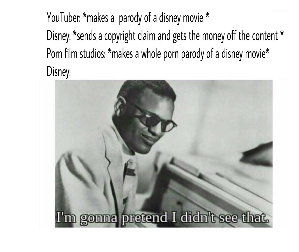

https://i.redd.it/31izo1ksq1221.jpg
When she says that four fingers isn't enough  aa ay


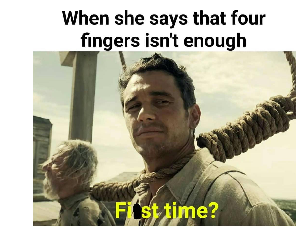

https://i.redd.it/uxos9b9qw2221.jpg
God of War: *exists*  Spider-Man: “exists*  Red Dead Redemption 2: *also exists” Fortnite: “wins game of the year*


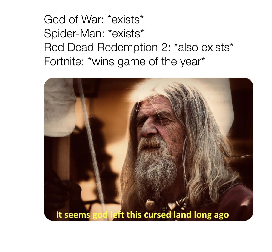

https://i.redd.it/eip072zt33221.jpg
ANY LAST WORD? NO, I'M ON A TIGHT  SCHEDULE TODAY. JUST ONE WORD.                    SHOULDN'T IT BE WORDS? PLURAL?


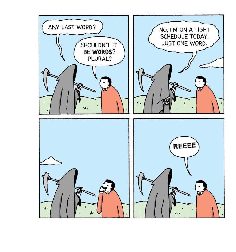

https://i.redd.it/tk3yae4l42221.jpg
being invisible  (powerful  handshake) John Cena My dad  (big biceps) (big biceps)


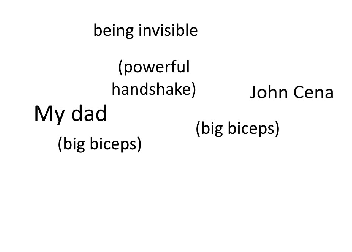

https://i.redd.it/r46nane3x2221.jpg
Download from | 41815588 Dreamstime.com  J Antoniodiaz | Dreamstime.com


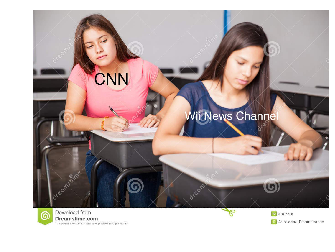

https://i.redd.it/n5gp4jcq61221.png
_


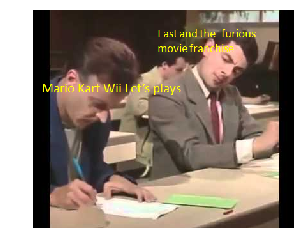

https://i.redd.it/a3dw1pedo1221.jpg
IV IS ‘TIME TO GO.  Was I a Good meme?


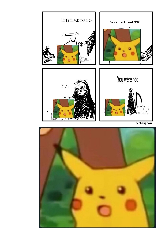

https://i.redd.it/84v5nczpv1221.jpg
when you learn Fortnite is winning GOTY  Maybe | should|just die.


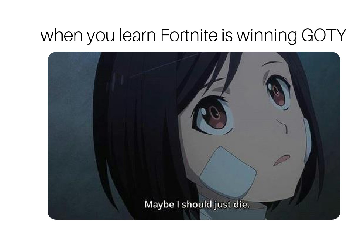

https://i.redd.it/e9106fbz11221.png
When you're a chemistry teacher but forgot to clean your vials


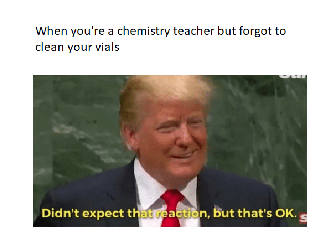

https://i.redd.it/mneczalhv1221.jpg
4 v4 wh! ellie pe Cas  ae! ‘ina ne the teacher about the homework      we -  kid whojconvince the teacher it's Cli tomorrow


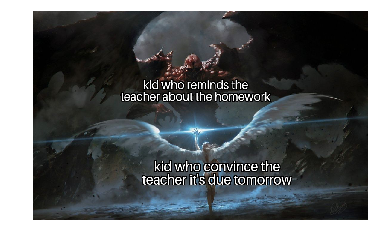

https://i.redd.it/5pyhpfm4f2221.jpg
I'm being robbed!  my husband just got stabbed!  ay this nigga selling pirated versions of


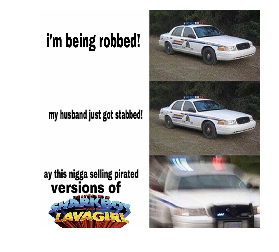

https://i.redd.it/mq4rpfduy1221.jpg



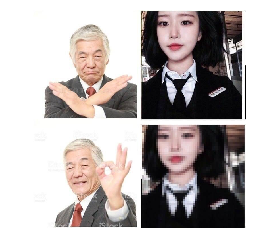

https://i.redd.it/hwiy4wfv32221.jpg



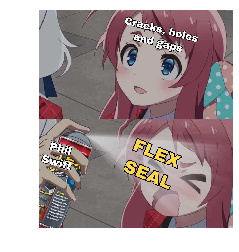

https://i.redd.it/gm0lu17572221.png
Problems we do in math class  Problems we get for homework  Problems we get ona test  The fact that we will never  use any of this the rest of our lives


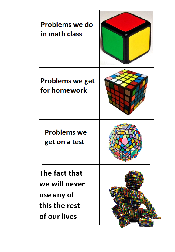

https://i.redd.it/rlp29vkbd1221.png



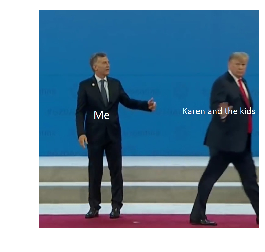

https://i.redd.it/lbz3208312221.jpg
c7 People who donate to * Wikipedia  Pike | Ne oS ¥ he ee | er te JL  a


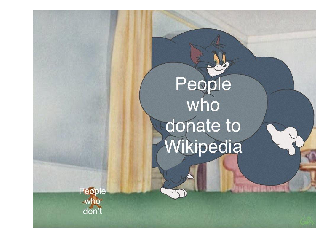

https://i.redd.it/1vkfr5mah2221.png
MY UNCLE


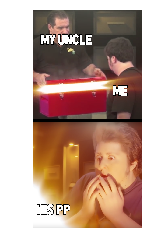

https://i.redd.it/kgtzu2xrc1221.jpg
Watching They Did Surgery on a Grape meme die within a week


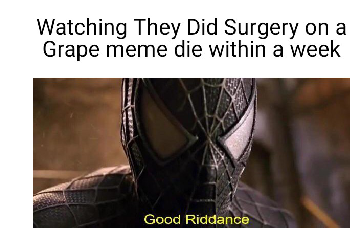

https://i.redd.it/7aa7b68fu2221.jpg
meaningless)  ine coins)


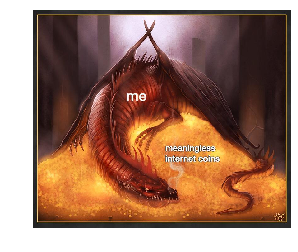

https://i.imgur.com/e0pXD9g.jpg
MY GRANDMA  en  CHEEKEOR oO


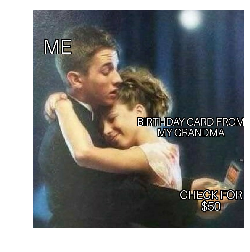

In [2]:
subreddit = 'dankmemes'
    
# Connect to reddit and download the subreddit front page
_secret     = ''# You will need to get your own credentials to put here
_clientId   = ''# and here, see link above.
_user_agent = 'windows:FindYourMeme:0.1'
r = praw.Reddit(client_id=_clientId, client_secret=_secret, user_agent=_user_agent)
submissions = r.subreddit(subreddit).hot(limit=25)

image_extensions = ('.jpg', '.png', '.gif')
for sub in submissions:
    if sub.url.endswith(image_extensions):
        print(sub.url)
        im = Image.open(requests.get(sub.url, stream=True).raw)
        print(pytesseract.image_to_string(im).replace('\n', ' '))
        plt.figure()
        plt.imshow(im)
        plt.axis('off')
        plt.show()